# Conjunto de dados de câncer de mama Wisconsin (diagnóstico)
Prever se o câncer é benigno ou maligno

Para a construção do modelo de Machine Learning, foi usado o banco de dados Wisconsin, 
disponibilizado no Repositório de Machine Learning da UCI, e disponível no Kaggle: 
https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

In [2]:
# importar os pacotes necessários
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

from sklearn import metrics
from scipy.stats import ks_2samp
from scipy.stats import t
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
import pycaret

In [3]:
#Carregar os dados
df = pd.read_csv('data.csv')
# visualizar as 10 primeiras entradas
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


# Descritiva básica univariada

In [5]:
#a base quanto ao número de linhas e colunas
print('DIMENSÕES DO DATAFRAME:')
print(f'Linhas:  {df.shape[0]}')
print(f'Colunas:  {df.shape[1]}')

DIMENSÕES DO DATAFRAME:
Linhas:  569
Colunas:  33


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
#'Unnamed: 32' não contém dados válidos, somente dados NaN
#removendo a coluna chamada 'Unnamed: 32' do DataFrame. 
#O parâmetro inplace=True indica que a alteração deve ser feita no próprio DataFrame.
df.drop('Unnamed: 32', axis=1, inplace=True)

In [8]:
#contando a quantidade de valores nulos em cada coluna do DataFrame.
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [9]:
#gerando estatísticas descritivas para o DataFrame, como média, desvio padrão e quartis.
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [10]:
#imprimindo os valores únicos do DataFrame, ordenados de forma crescente de acordo com a contagem de valores únicos 
#em cada coluna.
print('VALORES ÚNICOS: \n')
print(df.nunique().sort_values())

VALORES ÚNICOS: 

diagnosis                    2
smoothness_worst           411
symmetry_mean              432
radius_mean                456
radius_worst               457
smoothness_mean            474
texture_mean               479
concave points_worst       492
symmetry_se                498
fractal_dimension_mean     499
symmetry_worst             500
concave points_se          507
texture_worst              511
perimeter_worst            514
texture_se                 519
perimeter_mean             522
area_se                    528
compactness_worst          529
perimeter_se               533
concavity_se               533
fractal_dimension_worst    535
concavity_mean             537
compactness_mean           537
concavity_worst            539
area_mean                  539
radius_se                  540
compactness_se             541
concave points_mean        542
area_worst                 544
fractal_dimension_se       545
smoothness_se              547
id                   

Diagnósticos:
B    0.627417
M    0.372583
Name: diagnosis, dtype: float64


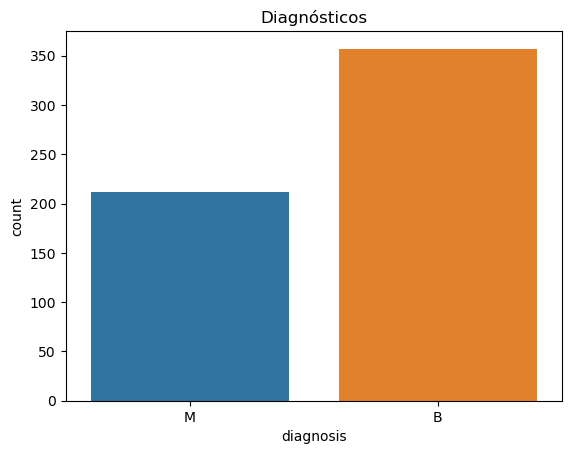

In [18]:
#imprimindo a contagem de diagnósticos em relação ao total de diagnósticos e,
#em seguida, criando um gráfico de barras para visualizar a distribuição dos diagnósticos no DataFrame.
print('Diagnósticos:')
print(df['diagnosis'].value_counts() / len(df['diagnosis']))

ax = sns.countplot(x='diagnosis', data=df)
ax.set_title('Diagnósticos')
ax;

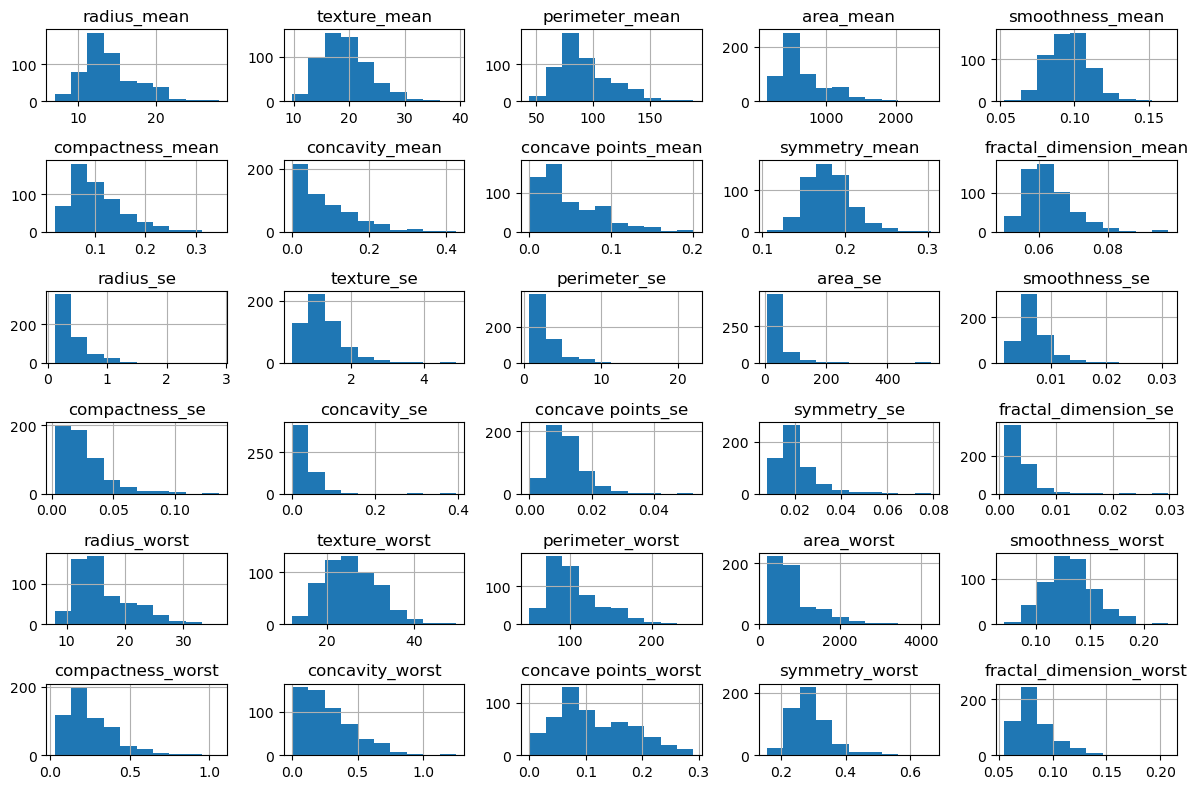

In [19]:
#plotar histogramas de features, criando um gráfico de histograma para cada coluna do DataFrame, excluindo a coluna 'id', 
#e ajustando o layout para que os subplots se encaixem na área da figura.
fig, ax = plt.subplots(figsize=(12,8))
df.drop('id', axis=1).hist(ax=ax)
plt.tight_layout()

In [20]:
#calculando a matriz de correlação para o DataFrame, ajustando o contexto do gráfico,
#definindo o tamanho da figura para exibir um heatmap da matriz de correlação.
corr = df.drop('id', axis=1).corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(10, 10))

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

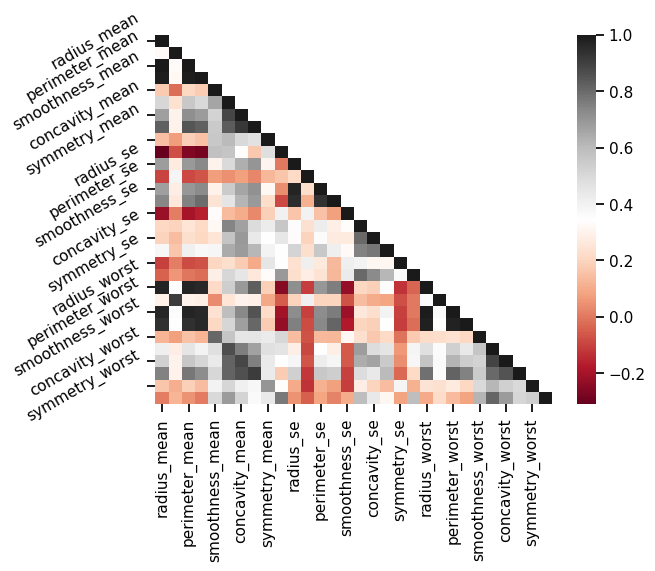

In [21]:
#criando uma máscara para ocultar a metade superior da matriz de correlação, em seguida,
#exibindo a matriz de correlação como um heatmap e ajustando as etiquetas do eixo x e y para melhor visualização.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, cmap='RdGy')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

# Preparação dos Dados

In [24]:
#separar as variáveis explicativas da variável dependente
#usando a função drop do Pandas para remover as colunas 'id' e 'diagnosis' do DataFrame, 
#armazenando o resultado em X, e atribuindo a coluna 'diagnosis' a Y.
X = df.drop(['id', 'diagnosis'], axis=1)
y = df['diagnosis']

In [25]:
metadados = pd.DataFrame(df.dtypes, columns=['dtype'])
metadados['valores_unicos'] = df.nunique()

metadados

,dtype,valores_unicos
id,int64,569
diagnosis,object,2
radius_mean,float64,456
texture_mean,float64,479
perimeter_mean,float64,522
area_mean,float64,539
smoothness_mean,float64,474
compactness_mean,float64,537
concavity_mean,float64,537
concave points_mean,float64,542


In [26]:
def IV(variavel, resposta):
    tab = pd.crosstab(variavel, resposta, margins=True, margins_name='total')

    rótulo_evento = tab.columns[0]
    rótulo_nao_evento = tab.columns[1]

    tab['pct_evento'] = tab[rótulo_evento]/tab.loc['total',rótulo_evento]
    tab['ep'] = tab[rótulo_evento]/tab.loc['total',rótulo_evento]
    
    tab['pct_nao_evento'] = tab[rótulo_nao_evento]/tab.loc['total',rótulo_nao_evento]
    tab['woe'] = np.log(tab.pct_evento/tab.pct_nao_evento)
    tab['iv_parcial'] = (tab.pct_evento - tab.pct_nao_evento)*tab.woe
    return tab['iv_parcial'].sum()

In [29]:
metadados = pd.DataFrame(df.dtypes, columns=['dtype'])
metadados['valores_unicos'] = df.nunique()
metadados['variavel'] = 'covariavel'
metadados.loc['mau','variavel'] = 'resposta'
metadados.loc['bom','variavel'] = 'resposta'
metadados

,dtype,valores_unicos,variavel
id,int64,569.0,covariavel
diagnosis,object,2.0,covariavel
radius_mean,float64,456.0,covariavel
texture_mean,float64,479.0,covariavel
perimeter_mean,float64,522.0,covariavel
area_mean,float64,539.0,covariavel
smoothness_mean,float64,474.0,covariavel
compactness_mean,float64,537.0,covariavel
concavity_mean,float64,537.0,covariavel
concave points_mean,float64,542.0,covariavel


In [36]:
def biv_discreta(var, df):
    df['bom'] = 1-df.mau
    g = df.groupby(var)
    
    biv = pd.DataFrame({'qt_bom': g['bom'].sum(),
                       'qt_mau': g['bom'].sum(),
                       'mau':g['bom'].mean(),
                       var: g['bom'].mean().index,
                       'cont':g[var].count()})
    biv['ep'] = (biv.mau*(1-biv.mau)/biv.cont)**.5
    biv['mau_sup'] = biv.mau+t.ppf([0.975], biv.cont-1)*biv.ep
    biv['mau_inf'] = biv.mau+t.ppf([0.025], biv.cont-1)*biv.ep
    
    biv['logit'] = np.log(biv.mau/(1-biv.mau))
    biv['logit_sup'] = np.log(biv.mau_sup/(1-biv.mau_sup))
    biv['logit_inf'] = np.log(biv.mau_sup/(1-biv.mau_inf))
    
    tx_mau_geral = df.mau.mean()
    woe_geral = np.log(df.mau.mean() / (1 - df.mau.mean()))
    
    biv['woe'] = biv.logit - woe_geral
    biv['woe_sup'] = biv.logit_sup - woe_geral
    biv['woe_inf'] = biv.logit_inf - woe_geral
    
    fig, ax = plt.subplots(2,1, figsize=(8,6))
    ax[0].plot(biv[var], biv.woe,  ':bo', label='woe')
    ax[0].plot(biv[var], biv.woe_sup, 'o:r', label='limite superior')
    ax[0].plot(biv[var], biv.woe_inf, 'o:r', label='limite superior')
        
    num_cat = biv.shape[0]
    ax[0].set_xlim([-.3, num_cat-.7])
    
    ax[0].set_ylabel("Weight of Evidence")
    ax[0].legend(bbox_to_anchor=(.83, 1.17), ncol=3)
    
    ax[0].set_xticks(list(range(num_cat)))
    ax[0].set_xticklabels(biv[var], rotation=15)
    
    ax[1] = biv.cont.plot.bar()
    return biv

Criando um pipeline utilizando o sklearn pipeline para o preprocessamento

In [40]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from pycaret.regression import create_model

X_digits, y_digits = load_digits(return_X_y=True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, test_size=0.3, random_state=10)

pca = PCA(n_components=20)

scaler = StandardScaler()

logistic = LogisticRegression(max_iter=200)

In [41]:
X_digits.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [42]:
X_digits.shape

(1797, 64)

Dataset de treino

In [43]:
# "Fitando" e aplicando Z score nos dados de treino
scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [44]:
# "Fitando" e aplicando o pca nos dados de treino
pca.fit(X_train)
X_train = pca.transform(X_train)

In [45]:
# "Fitando" e predizendo uma regressão logística nos dados de treino
logistic.fit(X_train, y_train)

logistic.predict(X_train)

array([0, 0, 0, ..., 2, 1, 2])

Dataset de teste

In [46]:
# Aplicando nos dados de teste o Z score "fitado" nos dados de treino  
X_test = scaler.transform(X_test)

In [47]:
# Aplicando nos dados de teste o PCA "fitado" nos dados de treino  
X_test = pca.transform(X_test)

In [48]:
# Predizendo nos dados de teste o modelo "fitado" nos dados de treino
logistic.predict(X_test)

array([5, 2, 5, 4, 8, 3, 4, 3, 3, 0, 8, 7, 0, 1, 8, 6, 9, 7, 9, 7, 1, 6,
       6, 7, 8, 8, 5, 8, 9, 9, 3, 3, 7, 3, 4, 1, 9, 2, 5, 4, 2, 1, 0, 1,
       2, 9, 6, 1, 9, 4, 4, 5, 8, 4, 8, 5, 9, 7, 8, 0, 4, 5, 8, 4, 7, 9,
       0, 7, 1, 3, 9, 3, 3, 8, 0, 7, 3, 6, 5, 2, 0, 8, 8, 0, 1, 2, 2, 8,
       8, 8, 2, 6, 3, 4, 7, 9, 8, 2, 9, 2, 5, 0, 8, 0, 4, 8, 8, 0, 6, 7,
       3, 3, 9, 1, 2, 4, 6, 0, 8, 8, 1, 1, 7, 9, 9, 5, 2, 3, 3, 9, 7, 6,
       2, 5, 4, 3, 8, 7, 6, 7, 2, 7, 4, 9, 5, 1, 9, 8, 6, 1, 8, 1, 4, 0,
       9, 9, 1, 2, 3, 5, 0, 3, 4, 1, 5, 4, 9, 3, 5, 6, 4, 0, 8, 6, 7, 0,
       9, 9, 4, 7, 5, 5, 2, 0, 6, 7, 5, 3, 9, 7, 1, 3, 2, 8, 3, 3, 1, 7,
       1, 1, 1, 7, 1, 6, 7, 6, 9, 5, 2, 3, 5, 2, 9, 5, 4, 8, 2, 9, 1, 5,
       4, 2, 3, 9, 0, 2, 0, 2, 1, 0, 5, 0, 6, 4, 2, 1, 9, 0, 9, 0, 6, 9,
       4, 4, 9, 7, 5, 6, 1, 5, 7, 0, 8, 6, 2, 5, 1, 2, 3, 8, 4, 4, 3, 5,
       7, 9, 7, 2, 0, 2, 0, 9, 2, 8, 6, 3, 1, 0, 6, 6, 6, 7, 1, 6, 1, 7,
       6, 0, 6, 3, 7, 4, 6, 2, 2, 0, 8, 4, 7, 3, 3,

Usando pipeline

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, test_size=0.3, random_state=10)

# Define a PCA to Linear dimensionality reduction
pca_pipe = PCA(n_components=15)

# Define a Standard Scaler to normalize inputs
scaler_pipe = StandardScaler()

# set the tolerance to a large value to make the example faster
logistic_pipe = LogisticRegression(max_iter=200)

In [50]:
pipe = Pipeline(steps=[("scaler", scaler_pipe), 
                       ("pca", pca_pipe), 
                       ("logistic", logistic_pipe)])

Analisando o objeto

In [51]:
pipe.named_steps

{'scaler': StandardScaler(),
 'pca': PCA(n_components=15),
 'logistic': LogisticRegression(max_iter=200)}

Dados de treino

In [52]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=15)),
                ('logistic', LogisticRegression(max_iter=200))])

In [53]:
pipe.predict(X_train)

array([0, 0, 0, ..., 1, 8, 2])

Dados de teste

In [54]:
pipe.predict(X_test)

array([5, 2, 5, 4, 8, 1, 4, 3, 3, 0, 8, 7, 0, 1, 8, 6, 9, 7, 9, 7, 1, 6,
       6, 7, 8, 8, 5, 8, 9, 9, 3, 3, 7, 3, 4, 1, 9, 2, 5, 4, 2, 1, 0, 1,
       2, 3, 6, 1, 9, 4, 4, 9, 8, 4, 8, 5, 9, 7, 1, 0, 4, 5, 8, 4, 7, 9,
       0, 7, 1, 3, 3, 3, 3, 8, 0, 7, 3, 6, 5, 2, 0, 8, 8, 0, 1, 2, 2, 8,
       8, 8, 2, 6, 3, 4, 7, 9, 8, 2, 9, 2, 5, 0, 8, 0, 4, 8, 8, 0, 6, 7,
       3, 3, 9, 1, 2, 4, 6, 0, 8, 8, 1, 1, 7, 8, 9, 5, 2, 3, 3, 9, 7, 6,
       2, 5, 4, 3, 8, 4, 6, 7, 2, 7, 4, 9, 5, 1, 9, 8, 6, 1, 8, 1, 4, 0,
       9, 9, 1, 2, 3, 5, 0, 3, 4, 1, 5, 4, 9, 3, 5, 6, 4, 0, 8, 6, 7, 0,
       9, 9, 4, 7, 9, 5, 2, 0, 6, 7, 5, 3, 9, 7, 1, 3, 2, 8, 8, 3, 1, 7,
       1, 1, 1, 7, 1, 6, 7, 6, 9, 5, 2, 3, 5, 2, 9, 5, 4, 8, 2, 0, 1, 5,
       4, 2, 3, 9, 0, 2, 0, 2, 1, 0, 5, 0, 6, 4, 2, 1, 9, 0, 9, 0, 6, 9,
       4, 4, 9, 7, 5, 6, 1, 8, 7, 0, 8, 6, 2, 5, 1, 2, 3, 8, 4, 4, 3, 5,
       7, 9, 7, 2, 0, 2, 0, 9, 2, 8, 6, 3, 1, 0, 6, 6, 6, 7, 1, 6, 1, 7,
       6, 0, 6, 3, 7, 4, 6, 2, 2, 0, 8, 4, 7, 3, 3,

In [55]:
pipe.named_steps

{'scaler': StandardScaler(),
 'pca': PCA(n_components=15),
 'logistic': LogisticRegression(max_iter=200)}

In [56]:
pipe[0]

StandardScaler()

In [57]:
pipe[1]

PCA(n_components=15)

In [58]:
pipe[2]

LogisticRegression(max_iter=200)

In [59]:
pipe[1].transform(X_train)

array([[  0.8710034 , -12.61619706, -18.95596763, ...,   5.17636307,
         15.90826833,   3.8177665 ],
       [  7.39002236,  -7.84616312, -16.49021546, ...,   8.57252057,
         19.77537072,   2.53130132],
       [  8.29000674, -10.0285489 , -14.17104037, ...,   9.12877103,
         27.07713045,   3.95241911],
       ...,
       [-12.90636297, -12.77040818,  16.691889  , ...,   1.61497779,
         10.26967727,   6.56658519],
       [-12.20192628,  -2.58786599,   7.00808792, ...,   8.70785279,
          9.56220392,   2.67934116],
       [-11.2145997 ,   2.61288525,   2.68324052, ...,   4.10767446,
         18.52130623,  -4.9260786 ]])

In [60]:
pca_pipe.transform(X_train)

array([[  0.8710034 , -12.61619706, -18.95596763, ...,   5.17636307,
         15.90826833,   3.8177665 ],
       [  7.39002236,  -7.84616312, -16.49021546, ...,   8.57252057,
         19.77537072,   2.53130132],
       [  8.29000674, -10.0285489 , -14.17104037, ...,   9.12877103,
         27.07713045,   3.95241911],
       ...,
       [-12.90636297, -12.77040818,  16.691889  , ...,   1.61497779,
         10.26967727,   6.56658519],
       [-12.20192628,  -2.58786599,   7.00808792, ...,   8.70785279,
          9.56220392,   2.67934116],
       [-11.2145997 ,   2.61288525,   2.68324052, ...,   4.10767446,
         18.52130623,  -4.9260786 ]])

In [61]:
#Aplicando o get_dummies() para transformar colunas catégoricas do dataframe em colunas de 0 e 1
dummy = pd.get_dummies(df, columns=['diagnosis'])

In [62]:
dummy

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_B,diagnosis_M
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0,1
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0,1
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0,1
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0,1


In [63]:
dummy.dtypes

id                           int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [66]:
#utilizando o pycaret para pre processar os dados e rodar o modelo xgboost. 
import pandas as pd
from pycaret.classification import *
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [67]:
dataset = df.sample()

In [68]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [70]:
dataset.drop(['id','Unnamed: 32'], axis=1, inplace=True)

In [71]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Conjunto de dados para modelagem (treino e teste): ' + str(data.shape))
print('Conjunto de dados não usados no treino/teste, apenas como validação: ' + str(data_unseen.shape))

Conjunto de dados para modelagem (treino e teste): (1, 31)
Conjunto de dados não usados no treino/teste, apenas como validação: (0, 31)


Alterando os dados de treino

In [72]:
from pycaret.classification import *

In [73]:
data.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [74]:
data.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
texture_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
perimeter_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
area_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
smoothness_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
compactness_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
concavity_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
concave points_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
symmetry_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fractal_dimension_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
exp = setup(data = df, target = 'diagnosis', experiment_name='cancer de mama',
                  normalize=True, normalize_method='zscore', 
                  transformation=True, transformation_method = 'quantile',
                  fix_imbalance=True)

,Description,Value
0,Session id,6187
1,Target,diagnosis
2,Target type,Binary
3,Target mapping,"B: 0, M: 1"
4,Original data shape,"(569, 33)"
5,Transformed data shape,"(671, 32)"
6,Transformed train set shape,"(500, 32)"
7,Transformed test set shape,"(171, 32)"
8,Numeric features,32
9,Rows with missing values,100.0%


In [77]:
best_model = compare_models(fold=4, sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9699,0.9924,0.9527,0.9665,0.9591,0.9353,0.9359,0.2300
lr,Logistic Regression,0.9573,0.9923,0.9392,0.9460,0.9422,0.9084,0.9089,3.7300
ada,Ada Boost Classifier,0.9699,0.9907,0.9392,0.9787,0.9583,0.9348,0.9356,0.2425
et,Extra Trees Classifier,0.9524,0.9896,0.9122,0.9577,0.9343,0.8970,0.8978,0.2800
lightgbm,Light Gradient Boosting Machine,0.9574,0.9870,0.9257,0.9582,0.9413,0.9079,0.9086,0.9325
gbc,Gradient Boosting Classifier,0.9573,0.9864,0.9257,0.9579,0.9414,0.9079,0.9083,0.4625
rf,Random Forest Classifier,0.9548,0.9837,0.9392,0.9395,0.9393,0.9033,0.9034,0.3375
nb,Naive Bayes,0.9323,0.9798,0.8986,0.9175,0.9075,0.8541,0.8548,0.1400
lda,Linear Discriminant Analysis,0.9398,0.9792,0.8986,0.9378,0.9170,0.8699,0.8712,0.1150
knn,K Neighbors Classifier,0.9449,0.9783,0.9257,0.9244,0.9247,0.8813,0.8817,0.3250


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

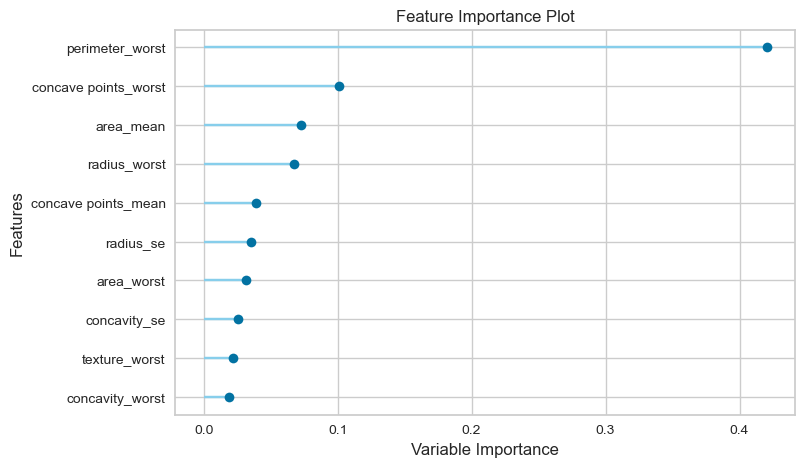

In [78]:
plot_model(best_model, plot='feature')

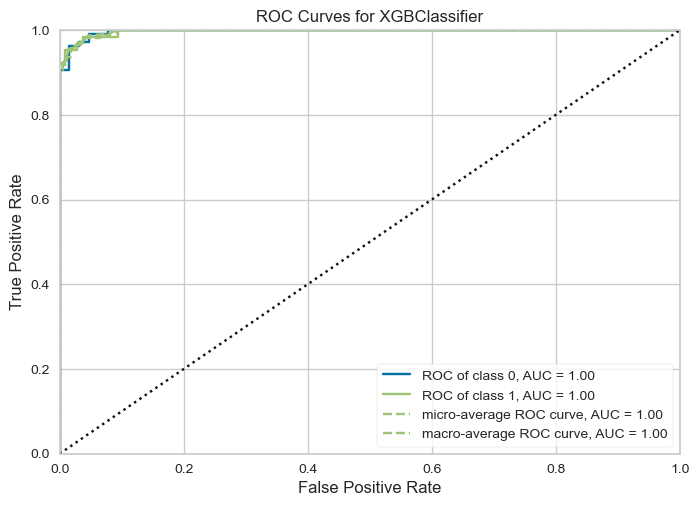

In [79]:
plot_model(best_model, plot='auc')

In [80]:
save_model(best_model,'xgboost 31 de dezembro de 2023')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['id', 'radius_mean',
                                              'texture_mean', 'perimeter_mean',
                                              'area_mean', 'smoothness_mean',
                                              'compactness_mean',
                                              'concavity_mean',
                                              'concave points_mean',
                                              's...
                                grow_policy=None, importance_type=None,
                                interaction_constraints=None, learning_rate=None,
                                max_bin=None, max_

In [82]:
model_saved = load_model('xgboost 31 de dezembro de 2023')

Transformation Pipeline and Model Successfully Loaded


In [83]:
model_saved.named_steps

{'label_encoding': TransformerWrapperWithInverse(exclude=None, include=None,
                               transformer=LabelEncoder()),
 'numerical_imputer': TransformerWrapper(exclude=None,
                    include=['id', 'radius_mean', 'texture_mean',
                             'perimeter_mean', 'area_mean', 'smoothness_mean',
                             'compactness_mean', 'concavity_mean',
                             'concave points_mean', 'symmetry_mean',
                             'fractal_dimension_mean', 'radius_se', 'texture_se',
                             'perimeter_se', 'area_se', 'smoothness_se',
                             'compactness_se', 'concavity_se',
                             'concave points_se', 'symmetry_se',
                             'fractal_dimension_se', 'radius_worst',
                             'texture_worst', 'perimeter_worst', 'area_worst',
                             'smoothness_worst', 'compactness_worst',
                          

In [84]:
xgboost = create_model('xgboost')
#Classificação usando lightgbm
tuned_xgboost = tune_model(xgboost)
#Finalizando o modelo para deploy
final_xgboost = finalize_model(tuned_xgboost)
evaluate_model(final_xgboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9250,0.9920,0.8667,0.9286,0.8966,0.8378,0.8391
1,0.9500,0.9840,0.9333,0.9333,0.9333,0.8933,0.8933
2,0.9750,0.9920,1.0000,0.9375,0.9677,0.9474,0.9487
3,0.9500,0.9627,0.8667,1.0000,0.9286,0.8904,0.8958
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9500,1.0000,1.0000,0.8824,0.9375,0.8961,0.9010
6,0.9750,1.0000,1.0000,0.9375,0.9677,0.9474,0.9487
7,0.9500,0.9947,0.8667,1.0000,0.9286,0.8904,0.8958
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9500,0.9973,0.9333,0.9333,0.9333,0.8933,0.8933
1,0.9250,0.9840,0.9333,0.8750,0.9032,0.8421,0.8433
2,0.9750,0.9973,1.0000,0.9375,0.9677,0.9474,0.9487
3,0.9000,0.9547,0.8667,0.8667,0.8667,0.7867,0.7867
4,0.9750,1.0000,1.0000,0.9375,0.9677,0.9474,0.9487
5,0.9500,1.0000,1.0000,0.8824,0.9375,0.8961,0.9010
6,0.9750,0.9973,1.0000,0.9375,0.9677,0.9474,0.9487
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

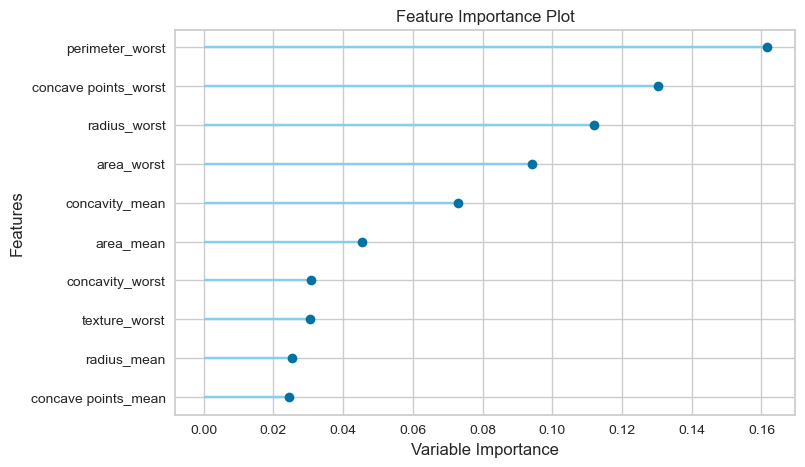

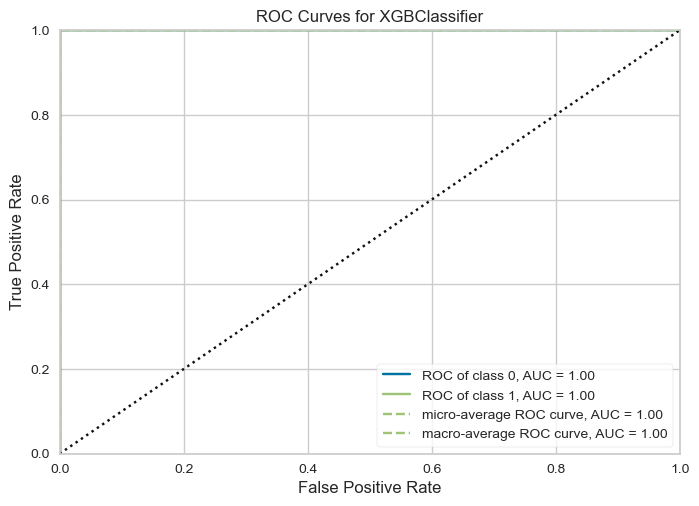

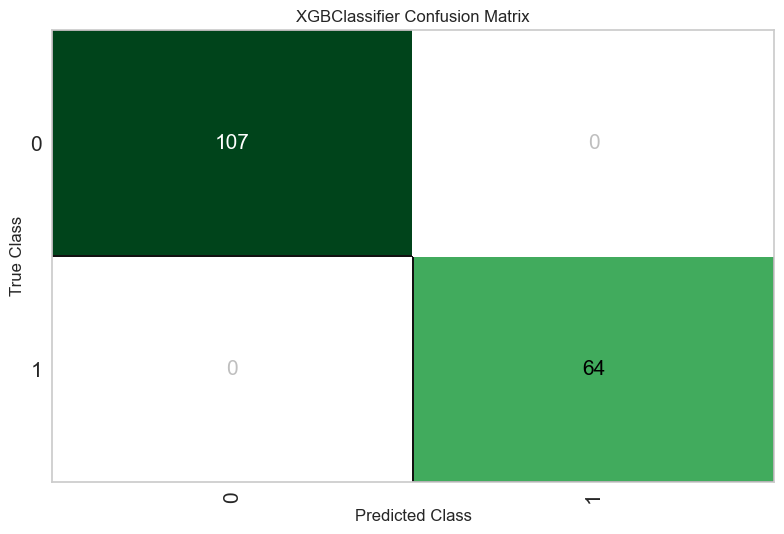

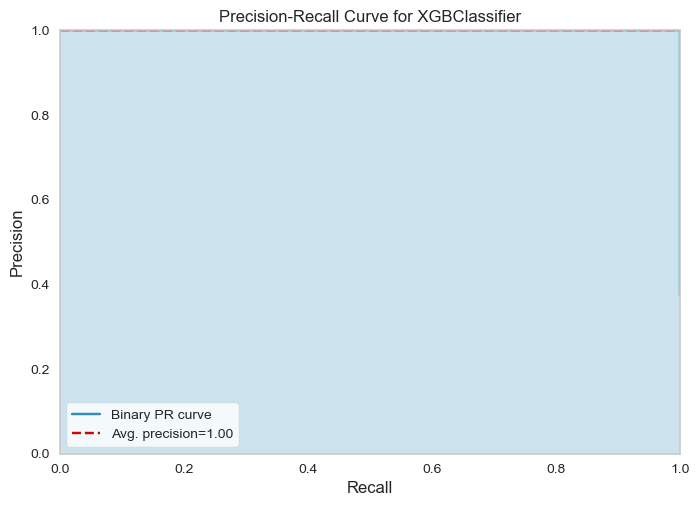

In [86]:
#Finalizando o modelo para deploy
#Importância das variáveis (Feature Importance) Plot
plot_model(final_xgboost, plot='feature')
# AUC Plot
plot_model(final_xgboost, plot='auc')
#Matriz de confusão (Confusion matrix)
plot_model(final_xgboost, plot='confusion_matrix')
#Precision-Recall Plot
plot_model(final_xgboost, plot='pr')

In [87]:
#Predict na amostra de test / hold-out
predict_model(final_xgboost)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,diagnosis,prediction_label,prediction_score
76,8610629,13.530,10.940000,87.910004,559.200012,0.12910,0.10470,0.068770,0.065560,0.2403,...,0.14510,0.13790,0.085390,0.074070,0.2710,0.07191,NaN,0,B,0.9980
314,894047,8.597,18.600000,54.090000,221.199997,0.10740,0.05847,0.000000,0.000000,0.2163,...,0.13470,0.07767,0.000000,0.000000,0.3142,0.08116,NaN,0,B,0.9985
567,927241,20.600,29.330000,140.100006,1265.000000,0.11780,0.27700,0.351400,0.152000,0.2397,...,0.16500,0.86810,0.938700,0.265000,0.4087,0.12400,NaN,1,M,0.9999
181,873593,21.090,26.570000,142.699997,1311.000000,0.11410,0.28320,0.248700,0.149600,0.2395,...,0.14910,0.75840,0.678000,0.290300,0.4098,0.12840,NaN,1,M,0.9999
337,897630,18.770,21.430000,122.900002,1092.000000,0.09116,0.14020,0.106000,0.060900,0.1953,...,0.14980,0.48270,0.463400,0.204800,0.3679,0.09870,NaN,1,M,0.9999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,88203002,11.220,33.810001,70.790001,386.799988,0.07780,0.03574,0.004967,0.006434,0.1845,...,0.09994,0.06885,0.023180,0.030020,0.2911,0.07307,NaN,0,B,0.9862
386,902975,12.210,14.090000,78.779999,462.000000,0.08108,0.07823,0.068390,0.025340,0.1646,...,0.10260,0.24310,0.307600,0.091400,0.2677,0.08824,NaN,0,B,0.9999
178,873357,13.010,22.219999,82.010002,526.400024,0.06251,0.01938,0.001595,0.001852,0.1395,...,0.08125,0.03432,0.007977,0.009259,0.2295,0.05843,NaN,0,B,0.9503
111,86408,12.630,20.760000,82.150002,480.399994,0.09933,0.12090,0.106500,0.060210,0.1735,...,0.12870,0.22500,0.221600,0.110500,0.2226,0.08486,NaN,0,B,0.9945


In [88]:
#Finalizando o modelo para deploy
final_xgb = finalize_model(final_xgboost)

In [90]:
#Parâmetros finais do modelo para deploy
print(final_xgb)

Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['id', 'radius_mean',
                                             'texture_mean', 'perimeter_mean',
                                             'area_mean', 'smoothness_mean',
                                             'compactness_mean',
                                             'concavity_mean',
                                             'concave points_mean',
                                             's...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=Non

In [91]:
predict_model(final_xgb);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [92]:
#Salvando o modelo final
save_model(final_xgb,'Final xgboost Model 31 de dezembro de 2023')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['id', 'radius_mean',
                                              'texture_mean', 'perimeter_mean',
                                              'area_mean', 'smoothness_mean',
                                              'compactness_mean',
                                              'concavity_mean',
                                              'concave points_mean',
                                              's...
                                grow_policy=None, importance_type=None,
                                interaction_constraints=None, learning_rate=0.1,
                                max_bin=None, max_c

In [93]:
#Carregando o modelo salvo
saved_final_rf = load_model('Final xgboost Model 31 de dezembro de 2023')

Transformation Pipeline and Model Successfully Loaded
